In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_boston
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [3]:
winequality = pd.read_csv('winequality.csv', sep=';')
winequality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
color                   6497 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
del winequality['color']

In [5]:
winequality.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [6]:
winequality.corr()['quality']

fixed acidity          -0.076743
volatile acidity       -0.265699
citric acid             0.085532
residual sugar         -0.036980
chlorides              -0.200666
free sulfur dioxide     0.055463
total sulfur dioxide   -0.041385
density                -0.305858
pH                      0.019506
sulphates               0.038485
alcohol                 0.444319
quality                 1.000000
Name: quality, dtype: float64

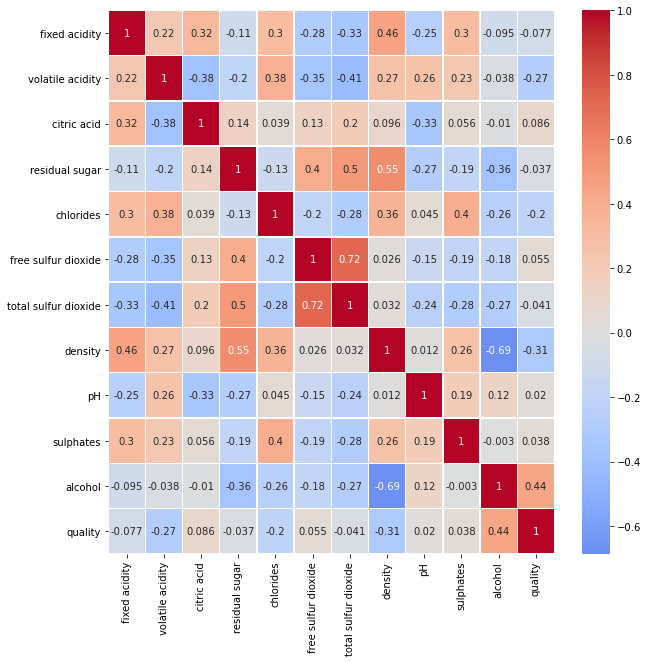

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(winequality.corr(),annot=True,linewidth=0.5,center=0,cmap='coolwarm')
plt.show()

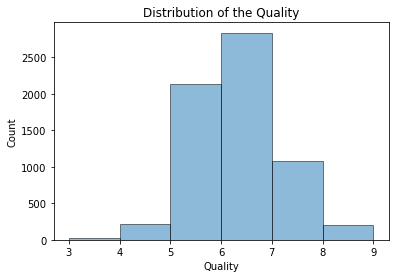

In [8]:
plt.hist(winequality.quality,bins=6,alpha=0.5,histtype='bar',ec='black')
plt.title('Distribution of the Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

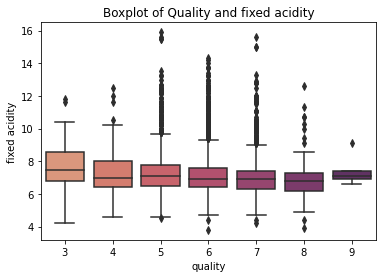

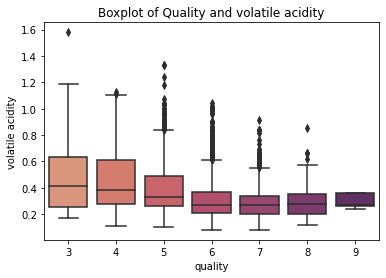

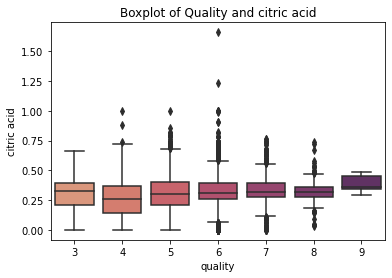

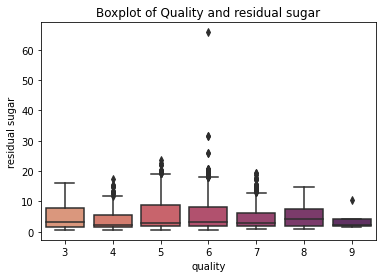

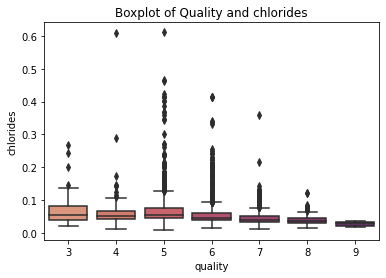

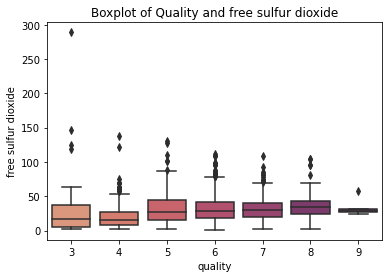

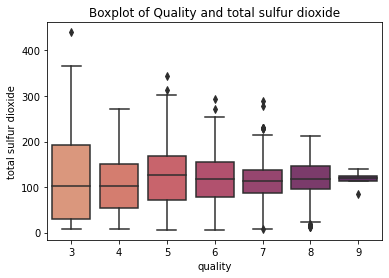

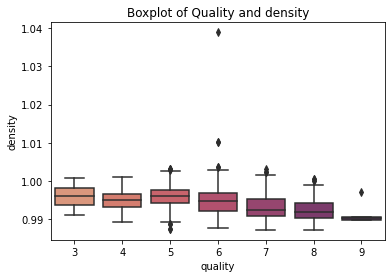

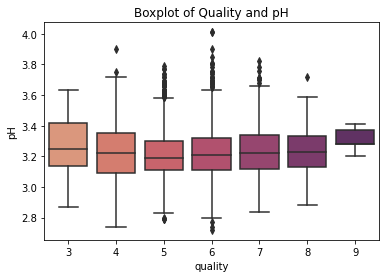

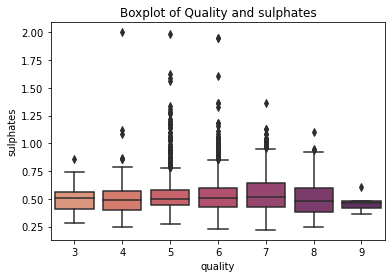

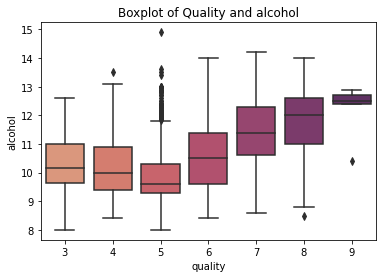

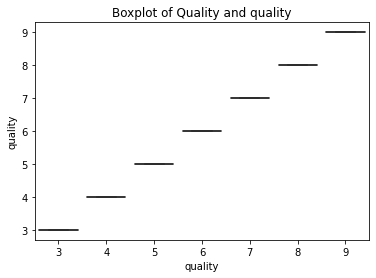

In [13]:
for column in winequality:
    sns.boxplot(x='quality',y=winequality[column],data=winequality,palette='flare')
    plt.title(f"Boxplot of Quality and {winequality[column].name}")
    plt.show()

## Modelling

In [34]:
X = winequality[list(winequality.columns)[:-1]]
y=winequality['quality']

In [35]:
X_train, X_test,y_train,y_test=train_test_split(X,y)

In [36]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_prediction=regressor.predict(X_test)

In [37]:
print('R-score is %s'%regressor.score(X_test,y_test))

R-score is 0.2855495128257364


In [40]:
scores=cross_val_score(regressor,X,y,cv=5)
print(scores.mean())

0.287358682725387


In [41]:
print(scores)

[0.29310713 0.2861489  0.30841772 0.29030742 0.25881223]


In [43]:
data=load_boston()

In [44]:
X_train, X_test, y_train, y_test = train_test_split(data.data,data.target)

In [45]:
X_scaler = StandardScaler()
y_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

In [46]:
from sklearn.preprocessing import scale

In [47]:
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

In [48]:
y_train = y_scaler.fit_transform(y_train)
y_test=y_scaler.fit_transform(y_test)

In [49]:
regressor = SGDRegressor(loss='squared_loss')

In [50]:
scores = cross_val_score(regressor, X_train, y_train, cv=5)

C:\Users\vprea\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\vprea\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\vprea\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\vprea\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

In [51]:
print('Cross validation r-squared scores:%s' %scores)
print('Average cross validation r-squared score:%s'%np.mean(scores))

Cross validation r-squared scores:[0.7048152  0.70074452 0.72217053 0.73104075 0.65311247]
Average cross validation r-squared score:0.70237669544535


In [52]:
y_test=y_test.flatten()
y_train=y_train.flatten()

In [53]:
regressor.fit(X_train, y_train)
print('Test set r-squared score:%s' %regressor.score(X_test, y_test))

Test set r-squared score:0.7335421139969711


In [ ]:
cols = winequality.columns

In [ ]:
seed = 101
np.random.seed(seed)
scale = StandardScaler()
Xtrain, Xtest, y_train, y_test = train_test_split(winequality.loc[:, cols], winequality.quality.values, test_size=0.20, random_state=101)
X_train = scale.fit_transform(Xtrain)
X_test = scale.transform(Xtest)

kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)
K = 1

for train, test in kfold.split(X_train, y_train):
    model = Sequential()
    model.add(Dense(128, kernel_initializer='normal',input_dim=10, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(256, kernel_initializer='normal', activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(256, kernel_initializer='normal', activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dense(1))
    #model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    #rmsprop = RMSprop(lr=0.0001)
    #model.compile(optimizer=rmsprop, loss='mse', metrics=['mae'])
    sgd = SGD(lr=0.01, momentum=0.7, decay=0.01, nesterov=False)
    model.compile(optimizer=sgd, loss='mse', metrics=['mae'])
    model.fit(X_train[train], y_train[train], batch_size=16, epochs=30, verbose=1)

    mse_value, mae_value = model.evaluate(X_train[test], y_train[test], verbose=0)
    print('Results from Kfold', K)
    print('-'*30)
    print('MSE {:1.4f}'.format(mse_value))
    print('MAE {:1.4f}'.format(mae_value))
    K += 1